In [37]:
import torch
import cv2
from models import EmoNeXt
import torch.nn as nn
from torch.hub import load_state_dict_from_url
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from torchvision import transforms
from PIL import Image

In [38]:
model_size = "base"
num_classes = 7
in_22k = False

model_urls = {
    "convnext_tiny_1k": "https://dl.fbaipublicfiles.com/convnext/convnext_tiny_1k_224_ema.pth",
    "convnext_small_1k": "https://dl.fbaipublicfiles.com/convnext/convnext_small_1k_224_ema.pth",
    "convnext_base_1k": "https://dl.fbaipublicfiles.com/convnext/convnext_base_1k_224_ema.pth",
    "convnext_large_1k": "https://dl.fbaipublicfiles.com/convnext/convnext_large_1k_224_ema.pth",
    "convnext_tiny_22k": "https://dl.fbaipublicfiles.com/convnext/convnext_tiny_22k_224.pth",
    "convnext_small_22k": "https://dl.fbaipublicfiles.com/convnext/convnext_small_22k_224.pth",
    "convnext_base_22k": "https://dl.fbaipublicfiles.com/convnext/convnext_base_22k_224.pth",
    "convnext_large_22k": "https://dl.fbaipublicfiles.com/convnext/convnext_large_22k_224.pth",
    "convnext_xlarge_22k": "https://dl.fbaipublicfiles.com/convnext/convnext_xlarge_22k_224.pth",
}


if model_size == "tiny":
    depths = [3, 3, 9, 3]
    dims = [96, 192, 384, 768]
    url = (
        model_urls["convnext_tiny_22k"]
        if in_22k
        else model_urls["convnext_tiny_1k"]
    )
elif model_size == "base":
        depths = [3, 3, 27, 3]
        dims = [128, 256, 512, 1024]
        url = (
            model_urls["convnext_base_22k"]
            if in_22k
            else model_urls["convnext_base_1k"]
        )

default_num_classes = 1000
if in_22k:
    default_num_classes = 21841

model = EmoNeXt(
    depths=depths, dims=dims, num_classes=default_num_classes, drop_path_rate=0.1
)

state_dict = load_state_dict_from_url(url=url)
model.load_state_dict(state_dict["model"], strict=False)
model.head = nn.Linear(dims[-1], num_classes)


model_path = "/home/adrien/src/MEXA-Hackathon-2025/data/EmoNeXt_base_2025-01-27 03_34_44.pt"
model_checkpoint = torch.load(model_path, weights_only=True, map_location=torch.device('cpu'))
# print(model_checkpoint['model'])
model.load_state_dict(model_checkpoint['model'])
model.eval()

print("Model loaded!")

Model loaded!


In [45]:
test_transform = transforms.Compose(
        [
            transforms.Grayscale(),
            transforms.Resize(236),
            transforms.TenCrop(224),
            transforms.Lambda(
                lambda crops: torch.stack(
                    [transforms.ToTensor()(crop) for crop in crops]
                )
            ),
            transforms.Lambda(
                lambda crops: torch.stack([crop.repeat(3, 1, 1) for crop in crops])
            ),
        ]
    )

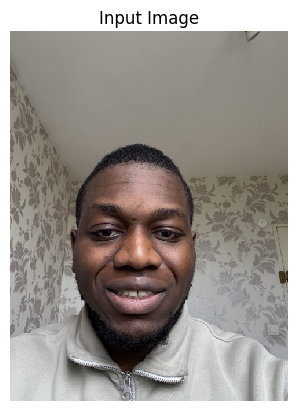

The person on the picture is: Happy


In [64]:
input_image_path = "/home/adrien/src/MEXA-Hackathon-2025/data/IMG_3481 - Moyenne.jpeg"

input_image = Image.open(input_image_path)

# # Plot with Matplotlib
plt.figure() # Optional: Adjust figure size
plt.imshow(input_image, interpolation="nearest", cmap="gray")
plt.axis("off")  # Hide axes
plt.title("Input Image")
plt.show()

with torch.no_grad():
    input_image_tensor = test_transform(input_image)
    pred = model(input_image_tensor)

    match pred[0][0]:
        case 0:
            pred_label = "Angry"
        case 1:
            pred_label = "Disgust"
        case 2:
            pred_label = "Fear"
        case 3:
            pred_label = "Happy"
        case 4:
            pred_label = "Neutral"
        case 5:
            pred_label = "Sad"
        case 6:
            pred_label = "Suprise"

    print(f"The person on the picture is: {pred_label}") 


Add more infos on the other labels able to be predict